In [131]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [132]:
input_tensor = torch.tensor([[0.3471, 0.4547, -0.2356]])
input_tensor = torch.randn(1, 3)
print(input_tensor)
print(input_tensor.shape)
print(input_tensor.size())
print(input_tensor.dtype)

tensor([[-0.8392,  0.0308,  0.1908]])
torch.Size([1, 3])
torch.Size([1, 3])
torch.float32


## **Our first neural network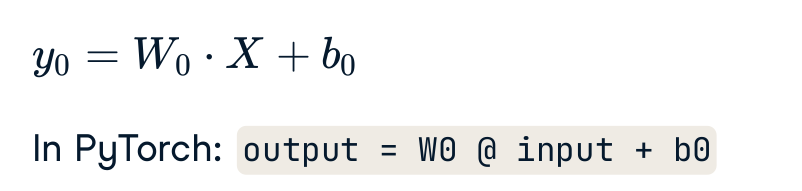**

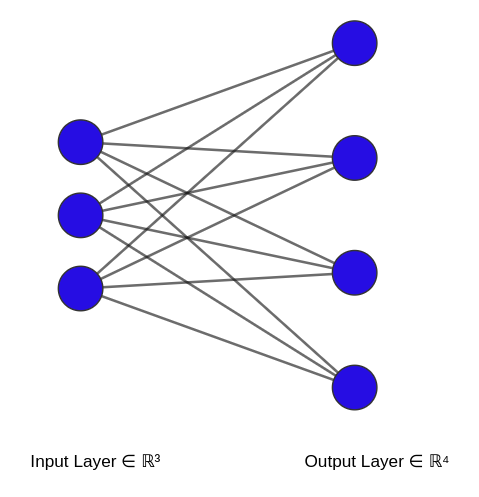



In [133]:
# Define our first linear layer
linear_layer = nn.Linear(in_features=3, out_features=4)
print(linear_layer)

Linear(in_features=3, out_features=4, bias=True)


In [134]:
linear_layer.weight

Parameter containing:
tensor([[-0.4894, -0.1921,  0.0555],
        [ 0.3937, -0.4212, -0.2989],
        [-0.2217, -0.4992, -0.5092],
        [ 0.4572,  0.1527, -0.4431]], requires_grad=True)

In [135]:
linear_layer.weight.shape

torch.Size([4, 3])

In [136]:
linear_layer.bias

Parameter containing:
tensor([ 0.1724,  0.0961, -0.0547, -0.0770], requires_grad=True)

In [137]:
linear_layer.bias.shape

torch.Size([4])

In [138]:
print(input_tensor.shape)
print(linear_layer.weight.shape)
print(linear_layer.bias.shape)

torch.Size([1, 3])
torch.Size([4, 3])
torch.Size([4])


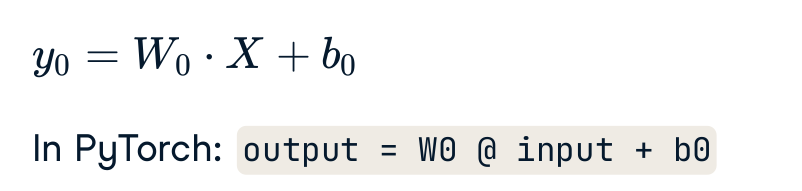

Por dentro vemos una multiplicación de matrices:

Nuestro ```input_tensor``` tiene la forma ```[1,3]``` \\
Nuestro ```weight``` tiene la forma ```[4,3]``` \\
Nuestro ```bias``` tiene la forma ```[4]``` \\
luego ```output``` tiene la forma ```[1,4]``` \\

A continuacion de ve la multiplicacion de los pesos con la entrada:

\begin{align*}
    \begin{pmatrix}
        w_1 & w_2 & w_3 \\
        w_4 & w_5 & w_6 \\
        w_7 & w_8 & w_9 \\
        w_{10} & w_{11} & w_{12}
    \end{pmatrix} . \begin{pmatrix}
                    i_1 \\
                    i_2 \\
                    i_3
                    \end{pmatrix}  = \begin{pmatrix}
                                        z_1 \\
                                        z_2 \\
                                        z_3 \\
                                        z_4
                                    \end{pmatrix}
\end{align*}

then, \\

\begin{align*}
\begin{pmatrix}
    z_1 \\
    z_2 \\
    z_3 \\
    z_4
\end{pmatrix} + \begin{pmatrix}
    b_1 \\
    b_2 \\
    b_3 \\
    b_4
\end{pmatrix}  = \begin{pmatrix}
    o_1 \\
    o_2 \\
    o_3 \\
    o_4
\end{pmatrix}
\end{align*}


In [139]:
# Pass input through linear layer
output = linear_layer(input_tensor)
print(output)

tensor([[ 0.5877, -0.3043,  0.0189, -0.5405]], grad_fn=<AddmmBackward0>)


In [140]:
print(output.shape)

torch.Size([1, 4])


## **Stacking layers with nn.Sequential()**

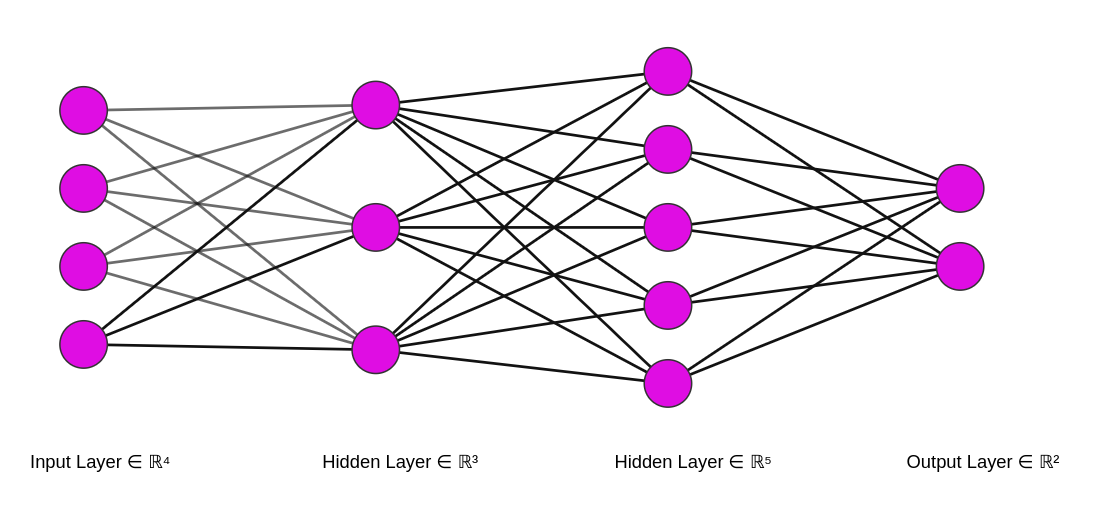

In [141]:
# Create network with three linear layers
model = nn.Sequential(
    nn.Linear(in_features=4, out_features=3),
    nn.Linear(3, 5),
    nn.Linear(5, 2)
)
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): Linear(in_features=3, out_features=5, bias=True)
  (2): Linear(in_features=5, out_features=2, bias=True)
)


In [142]:
for e in model.children():
    print(e.weight.shape)
    print(f'''weights: \t {e.weight}''')

torch.Size([3, 4])
weights: 	 Parameter containing:
tensor([[-0.3623,  0.4446,  0.0452,  0.2988],
        [ 0.1865,  0.4282,  0.1513,  0.3248],
        [-0.1530,  0.0778,  0.2052,  0.4082]], requires_grad=True)
torch.Size([5, 3])
weights: 	 Parameter containing:
tensor([[ 0.0388,  0.4733, -0.4893],
        [-0.2636,  0.1551, -0.4785],
        [ 0.4325,  0.3302, -0.3186],
        [ 0.4364, -0.0741, -0.0036],
        [ 0.0827,  0.3629,  0.0333]], requires_grad=True)
torch.Size([2, 5])
weights: 	 Parameter containing:
tensor([[ 0.2751,  0.3454,  0.2623,  0.2665, -0.1443],
        [-0.0911,  0.0080, -0.0751,  0.1004,  0.3491]], requires_grad=True)


In [145]:
for e in model.children():
    print(e.bias)

Parameter containing:
tensor([-0.0500,  0.2163, -0.1154], requires_grad=True)
Parameter containing:
tensor([-0.3728, -0.2427, -0.0721,  0.0971,  0.3445], requires_grad=True)
Parameter containing:
tensor([-0.1734, -0.1700], requires_grad=True)


In [143]:
in_tensor = torch.randn(1,4)
print(in_tensor)

tensor([[-0.4637, -0.5040,  0.3959,  0.1832]])


In [144]:
# Pass input_tensor to model to obtain output
out_tensor = model(in_tensor)
print(out_tensor)

tensor([[-0.4286,  0.0035]], grad_fn=<AddmmBackward0>)
